# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.stats.api as sms
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    roc_curve,
    make_scorer,
)
# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
#pip install warnings
import warnings
warnings.filterwarnings('ignore')

## Data Overview

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the dataset on a dataframe called 'data'
data = pd.read_csv('/content/drive/MyDrive/Data Science and Business Analytics/Supervised Learning - Classification/Project/INNHotelsGroup.csv')

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
data.shape

(36275, 19)

- The dataset contains 36,275 rows and 19 attributes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* Dependent variable is the booking status which is of categorical type.
* Booking ID, type of meal plan, room type reserved and market segment type are of categorical type, avg price per room is of float type while other variables are of integer type.
* There are no missing values in the dataset.

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


In [ ]:
data.duplicated().sum()

0

- There are no duplicates on the dataset

In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- There are no missing values on the dataset

## Exploratory Data Analysis (EDA)

###Univariate Analysis

####Functions

In [ ]:
# creating a function to ilustrate the boxplot and histogram of a single variable together
def histogram_boxplot(data, feature, figsize=(10,5), kde=True, bins=None):
  '''
  Boxplot and histogram combined
  data: dataframe
  feature: dataframe column
  figsize: size of figure
  kde: wheater to show the density curve
  bins: number of bins for histogram
  '''
  f2, (ax_box2, ax_hist2)=plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': (0.25, 0.75)}, figsize=figsize,) # Number of rows of the subplot grid=2, x-axis will be shared among all subplots and creating the 2 subplots
  sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color='green') # Boxplot will be created and a triangle will indicate the mean value of the column
  sns.histplot(data=data, x=feautre, kde=kde, ax=ax_hist2, bins=bins) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2) # For histogram
  ax_hist2.axvline(data[feature].mean(), color='violet', linestyle='--') # Add mean to the histogram
  ax_hist2.axvline(data[feature].median(), color='black', linestyle='-') # Add median to the histogram

In [ ]:
# creating a function to create labeled barplots
def labeled_barplot(data, feature, perc=False, legend=False, n=None):
  '''
  Barplot with percentage at the top
  data: dataframe
  feature: dataframe column
  perc: whether to display percentages instead of count (default is False)
  n: display the top n category levels (default is None, i.e., display all levels)
  '''
  total=len(data[feature]) # Lenght of the column
  count=data[feature].nunique()
  if n is None:
    plt.figure(figsize=(count + 2, 6))
  else:
    plt.figure(figsize=(n +2, 6))

  plt.xticks(rotation=90, fontsize=15)
  ax=sns.countplot(data=data, x=feature, hue=feature, legend=False, palette='Paired', order=data[feature].value_counts().index[:n],)

  for p in ax.patches:
    if perc == True:
      label = "{:.1f}%".format(100*p.get_height() / total) # Percentage of each class of the category
      x = p.get_x() + p.get_width() / 2  # width of the plot
      y = p.get_height() # height of the plot
      ax.annotate(label, (x,y), ha='center', va='center', size=12, xytext=(0,5), textcoords='offset points',) # annotate the percentage
    else:
      label = p.get_height() #count of each level of the category


  plt.show()

####Booking Status
- 32.8% of the bookings end up beeing canceled which is quite high.

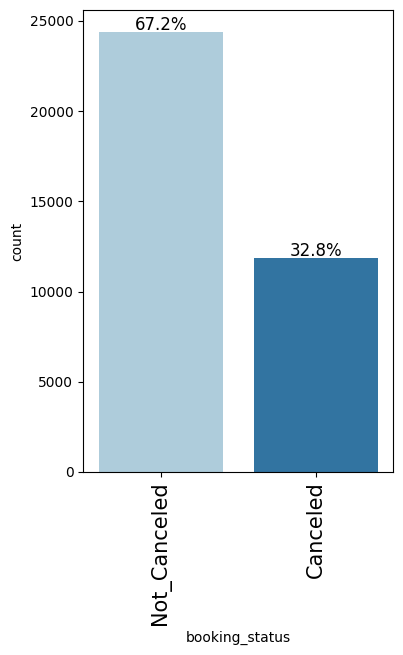

In [ ]:
labeled_barplot(data, 'booking_status', perc=True)

####Market Segment Type
- The mayority of bookings are made online (almost two thirds)

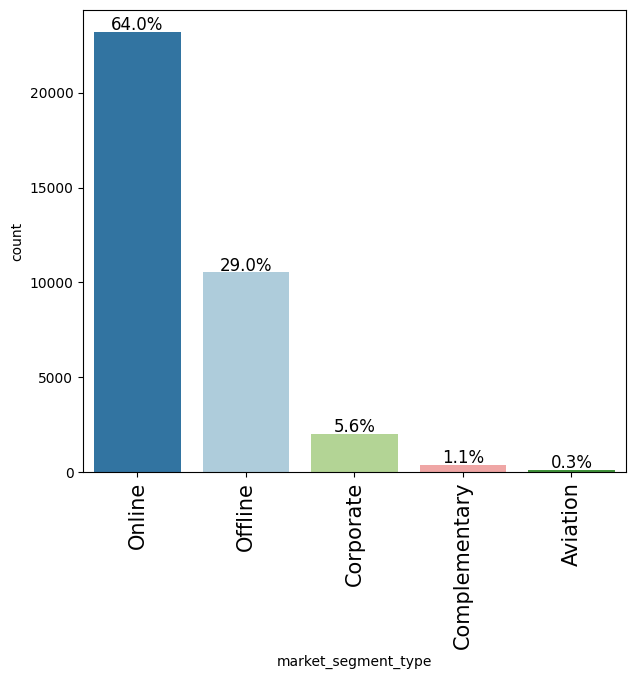

In [ ]:
labeled_barplot(data, 'market_segment_type', perc=True)

####Room Type Reserved
- Room type 1 is significantly the most popular choice, comprising 77.5% of all bookings

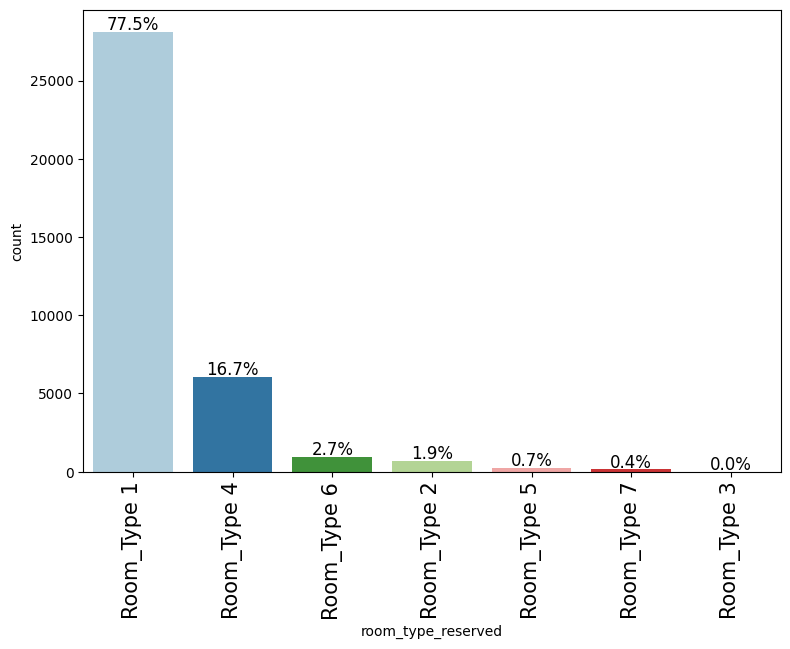

In [ ]:
labeled_barplot(data, 'room_type_reserved', perc=True)

####Type of Meal Plan
- Meal plan 1, which corresponds to breakfast, is the favored choice, making up 76.7% of all bookings.

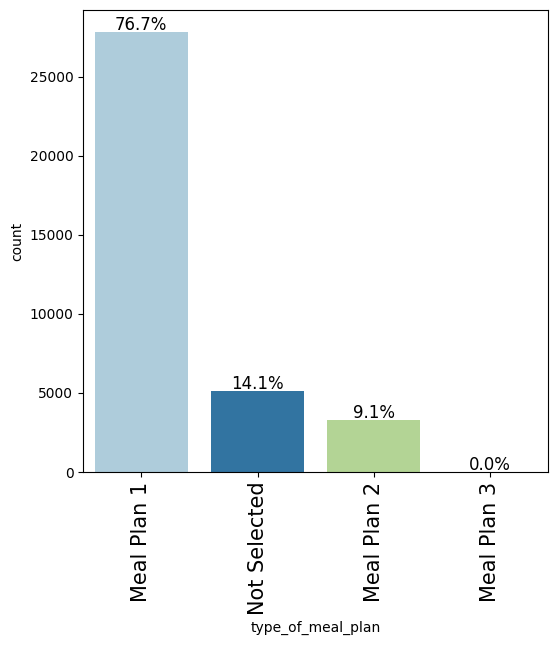

In [ ]:
labeled_barplot(data, 'type_of_meal_plan', perc=True)

####Booking ID
- The Booking ID is unique to each booking and does not offer any valuable information for predicting booking cancellations. Consequently, we will remove it from our dataset and future modeling efforts.

In [ ]:
data['Booking_ID'].nunique()

36275

#### Number of Adults
- Most bookings are for 2 people

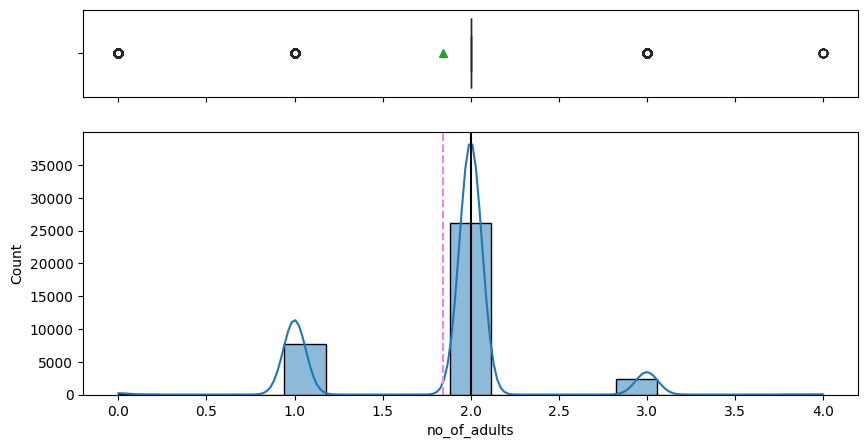

In [ ]:
histogram_boxplot(data, 'no_of_adults')

####Number of Children
- Most bookings do not include children

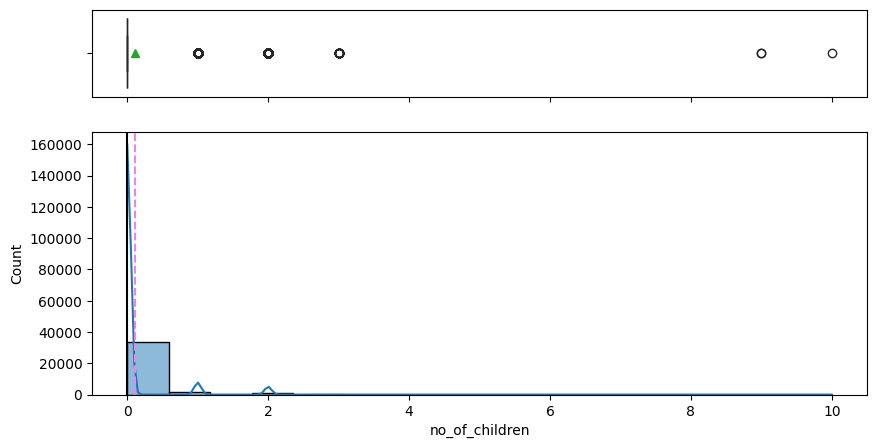

In [ ]:
histogram_boxplot(data, 'no_of_children')

####Number of Weekend Nights
- Approximately half of the bookings are for weekend nights, with around half of these lasting just one night, while the remaining half extend to two nights, with some exceptions for longer stays.

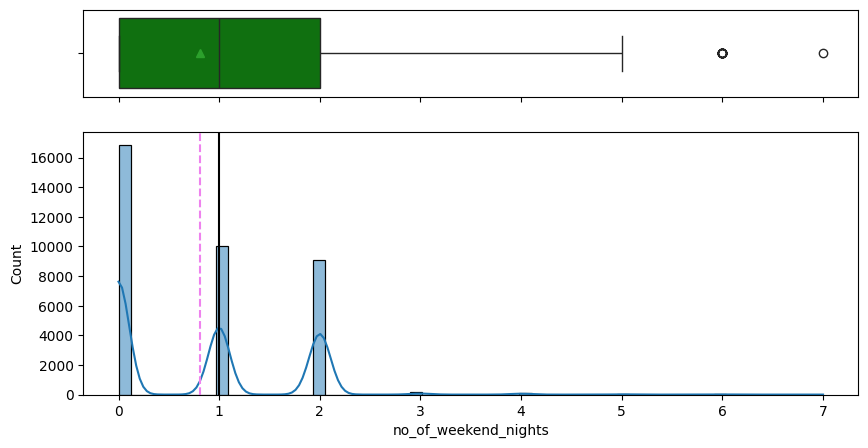

In [ ]:
histogram_boxplot(data, 'no_of_weekend_nights')

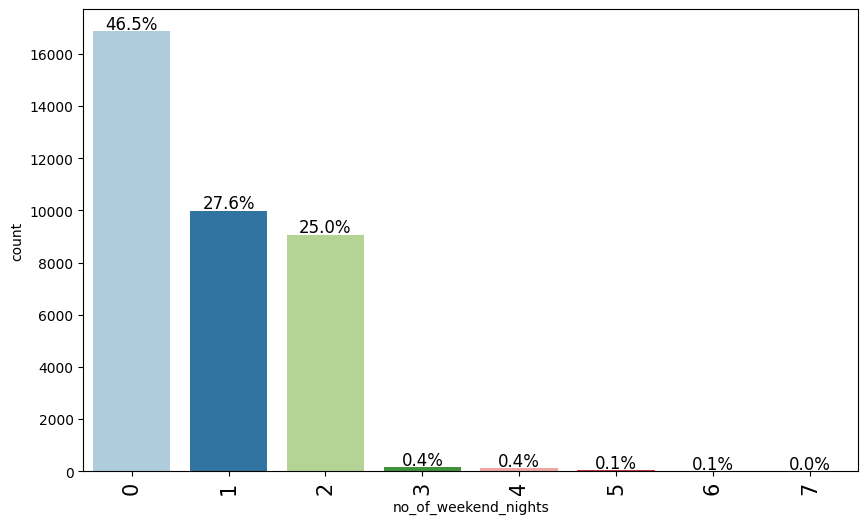

In [ ]:
labeled_barplot(data, 'no_of_weekend_nights', perc=True)

#### Number of week nights
- The most frequent booking duration is for 2 nights per week, with 1 night bookings following closely behind, and 3-night stays coming in third.

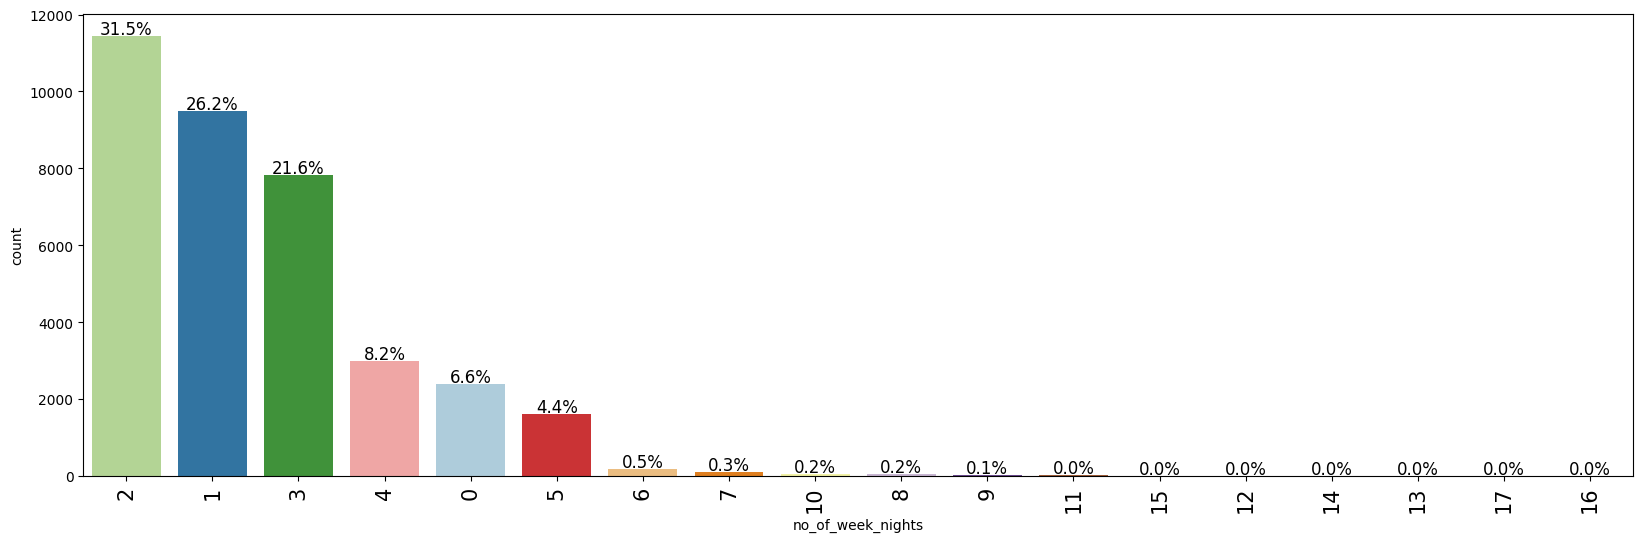

In [ ]:
labeled_barplot(data, 'no_of_week_nights', perc=True)

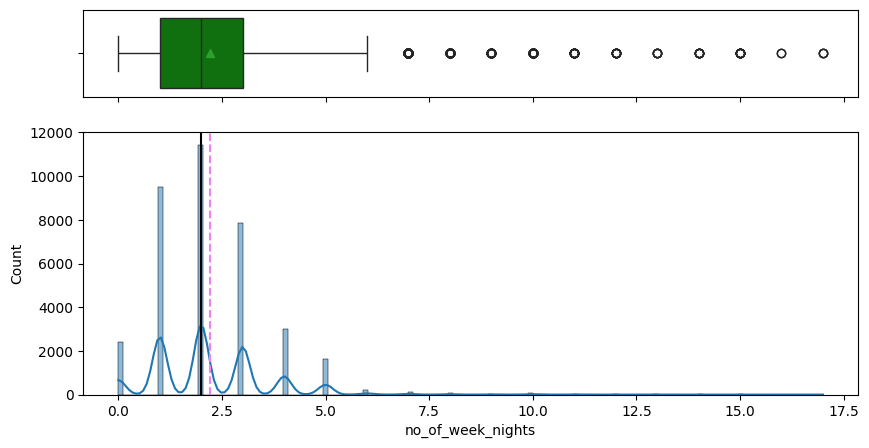

In [ ]:
histogram_boxplot(data, 'no_of_week_nights')

#### Required car parking space
- 97% of bookings indicated that don't need parking space

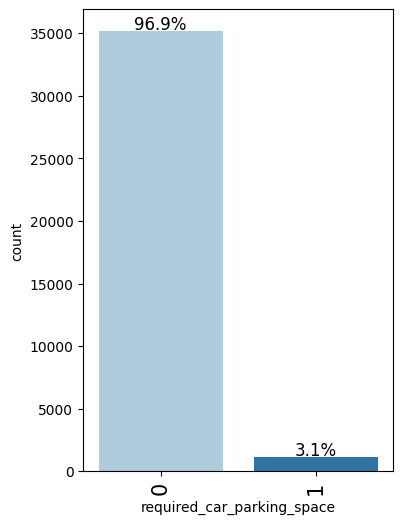

In [ ]:
labeled_barplot(data, 'required_car_parking_space', perc=True)

####Lead time (days between booking and arrival)
- The average time between booking and arrival is ~3 months with a median of ~2 months
- The distribution of lead time is skewed right showing some outliers


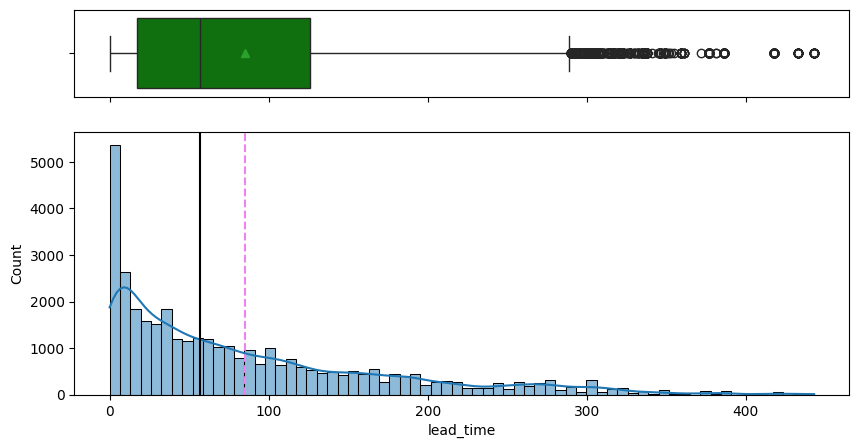

In [ ]:
histogram_boxplot(data, 'lead_time')

In [ ]:
data['lead_time'].mean()

85.23255685733976

In [ ]:
data['lead_time'].median()

57.0

In [ ]:
print((data['lead_time'].value_counts(normalize=True))*100)

0      3.575465
1      2.971744
2      1.772571
3      1.736733
4      1.731220
         ...   
300    0.002757
353    0.002757
328    0.002757
352    0.002757
351    0.002757
Name: lead_time, Length: 352, dtype: float64


####Arrival Year
- 82% of booking arrivals are in 2018 and 18% in 2017

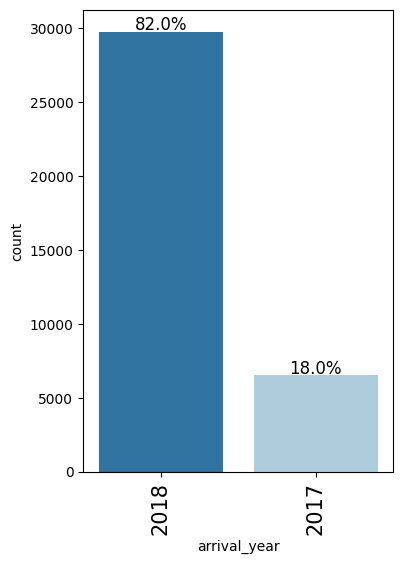

In [ ]:
labeled_barplot(data, 'arrival_year', perc=True)

####Arrival Month
- The most booked month is October followed by September and August
- The least booked month is January followed by February and March


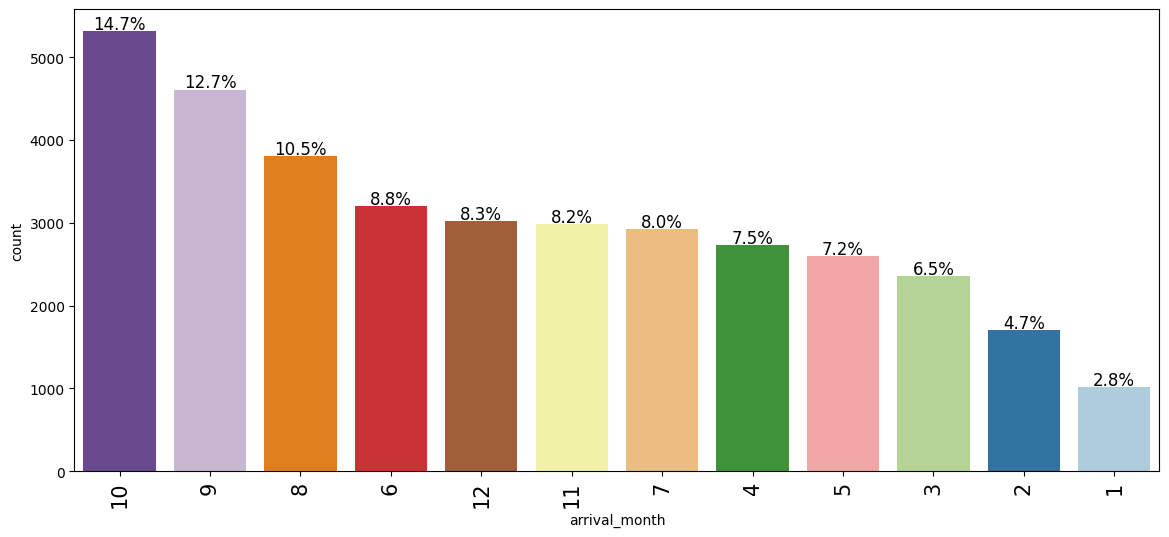

In [ ]:
labeled_barplot(data, 'arrival_month', perc=True)

####Arrival Date (date of the month)
- The arrival date shows consistency throughout the month, except for day 31, which is not present in all months as expected.

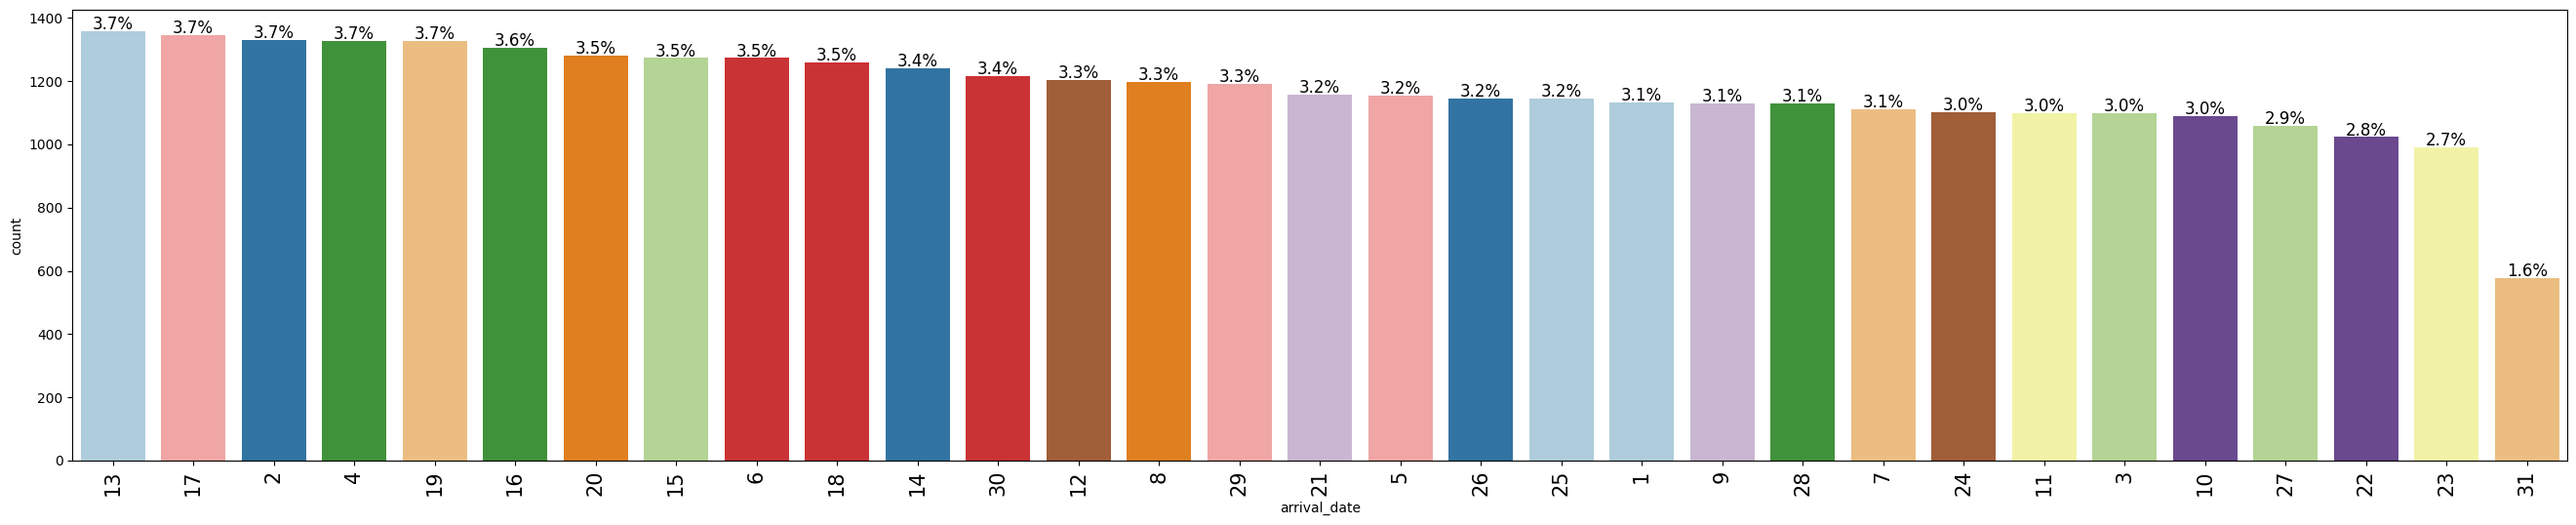

In [ ]:
labeled_barplot(data, 'arrival_date', perc=True)

####Repeated Guest
- The majority of guests are first-time bookers, with only 2.6% being repeat guests.



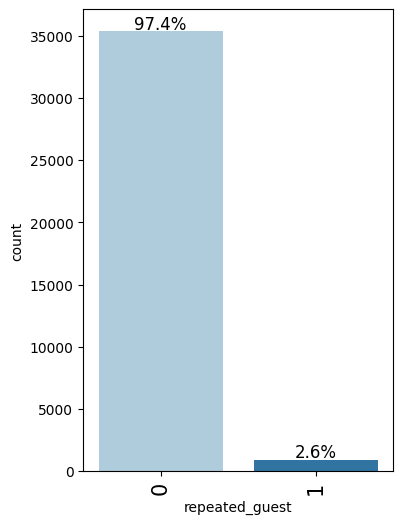

In [ ]:
labeled_barplot(data, 'repeated_guest', perc=True)

####Number of previous cancelations
- There are 99% of no previous cancelations

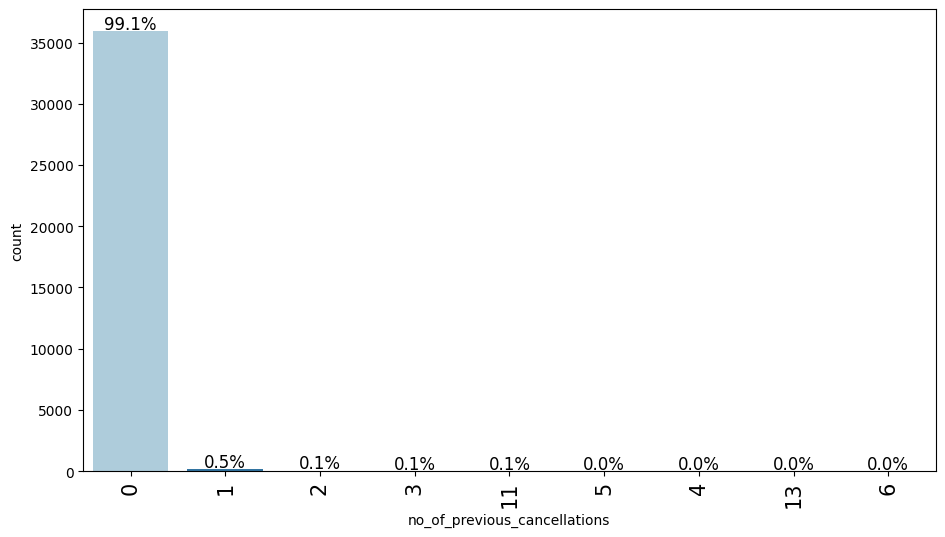

In [ ]:
labeled_barplot(data, 'no_of_previous_cancellations', perc=True)

####Number of previous bookings not canceled
- There are almost none previous bookings not canceled by the customer prior to the current booking

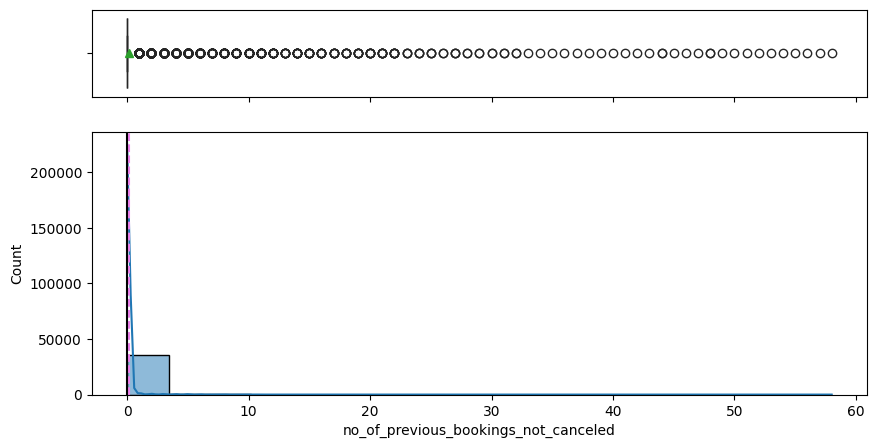

In [ ]:
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')

####Average price per room
- The distribution for the average price per room is close to nomral with many outliers to both ends.
- The mean and median are close to $100 euros per day

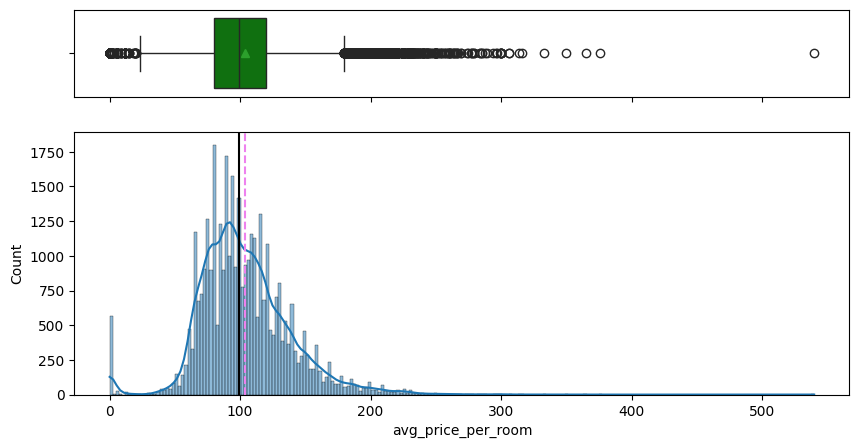

In [ ]:
histogram_boxplot(data, 'avg_price_per_room')

####Number of special requests

- Roughly half of customers do not have any special requests. Of the remaining customers, 31% have one special request, while 12% have two special requests.

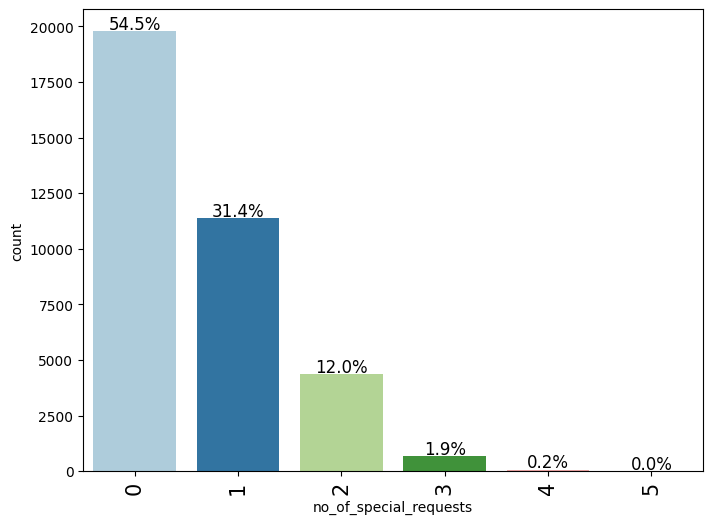

In [ ]:
labeled_barplot(data, 'no_of_special_requests', perc=True)

###Bivariate Analysis

#### Market segment vs booking status
- Bookings made online have the highest cancelation rate followed by offline and aviation.
- Bookings made through corporations have lower cancelation rates
- Complementary bookings have 0 cancelations

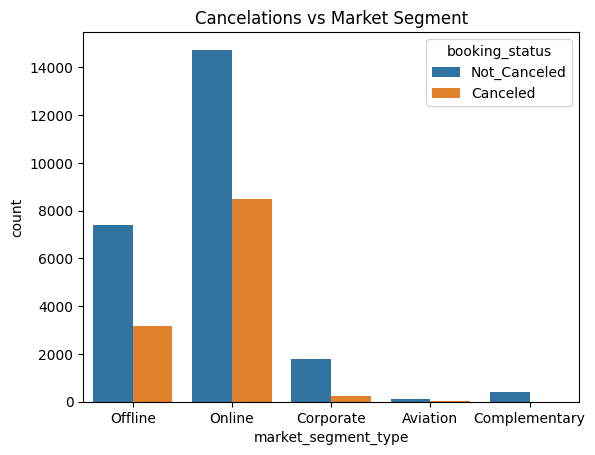

In [ ]:
sns.countplot(data=data, x='market_segment_type', hue='booking_status')
plt.title('Cancelations vs Market Segment');

In [ ]:
# Create a pivot table to calculate the count of canceled and not canceled bookings for each market segment type
pivot_table = pd.pivot_table(data, index='market_segment_type', columns='booking_status', aggfunc='size', fill_value=0)

# Normalize the pivot table to get the proportion of 'canceled' and 'not canceled' for each market segment type
# axis=1 divides each row by its sum to get the proportion
proportions = pivot_table.div(pivot_table.sum(axis=1), axis=0)

print(proportions)

booking_status       Canceled  Not_Canceled
market_segment_type                        
Aviation             0.296000      0.704000
Complementary        0.000000      1.000000
Corporate            0.109073      0.890927
Offline              0.299487      0.700513
Online               0.365081      0.634919


#### Room type vs booking status
- Cancellation ratios are generally consistent across most room types. However, room type 6 exhibits slightly higher cancellation proportions compared to the other room types.

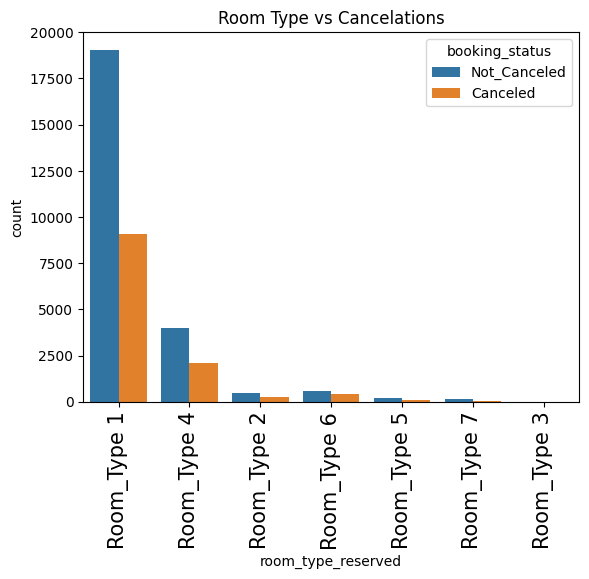

In [ ]:
sns.countplot(data=data, x='room_type_reserved', hue='booking_status')
plt.xticks(rotation=90, fontsize=15)
plt.title('Room Type vs Cancelations');

In [ ]:
pivot_table = pd.pivot_table(data, index='room_type_reserved', columns='booking_status', aggfunc='size', fill_value=0)
proportions = pivot_table.div(pivot_table.sum(axis=1), axis=0)

print(proportions)

booking_status      Canceled  Not_Canceled
room_type_reserved                        
Room_Type 1         0.322503      0.677497
Room_Type 2         0.329480      0.670520
Room_Type 3         0.285714      0.714286
Room_Type 4         0.341588      0.658412
Room_Type 5         0.271698      0.728302
Room_Type 6         0.420290      0.579710
Room_Type 7         0.227848      0.772152


####Lead Time vs Booking Status
- There are more booking cancelations as the lead time extends.

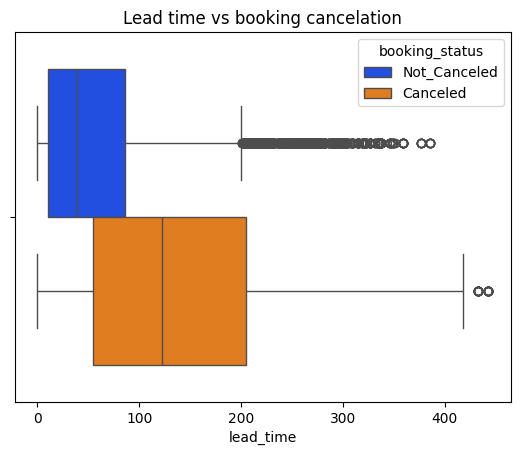

In [ ]:
sns.boxplot(data=data, x='lead_time', hue='booking_status', palette='bright')
plt.title('Lead time vs booking cancelation');

####Average price vs. type of segment
- On average, online pricing tends to be the highest. However, there are offline bookings that exceed the pricing of other booking channels.


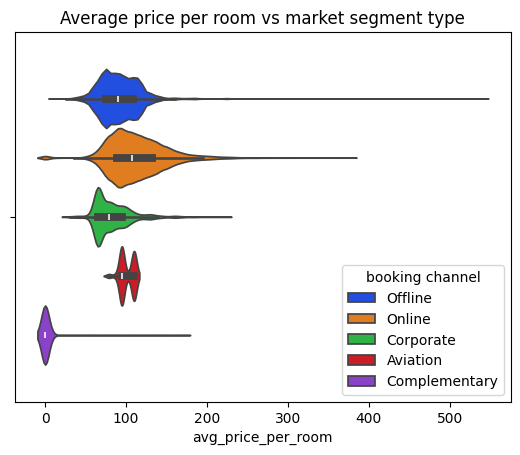

In [ ]:
sns.violinplot(data=data, x='avg_price_per_room', hue='market_segment_type', palette='bright')
# Add a legend with layout to lower right
plt.legend(title="booking channel", loc="lower right", bbox_to_anchor=(1, 0))
plt.title('Average price per room vs market segment type')
plt.show()

####Room Price vs Month of Arrival
- Room prices exhibit a slight increase during the middle months of the year in comparison to the initial and final months of the year.

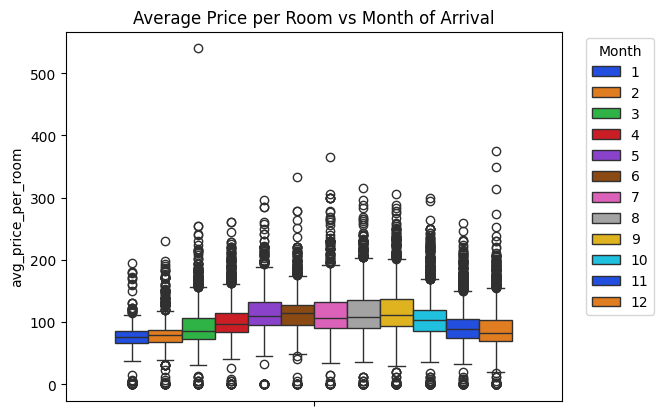

In [ ]:
sns.boxplot(data=data, y='avg_price_per_room', hue='arrival_month', palette='bright', dodge=True)
plt.legend(title="Month", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.title('Average Price per Room vs Month of Arrival')
plt.show()

####Repeated guests vs booking status
- Repeated guests are frequent visitors to the hotel and play a significant role in building brand loyalty. Only 1.7% of repeat guests have cancellations.

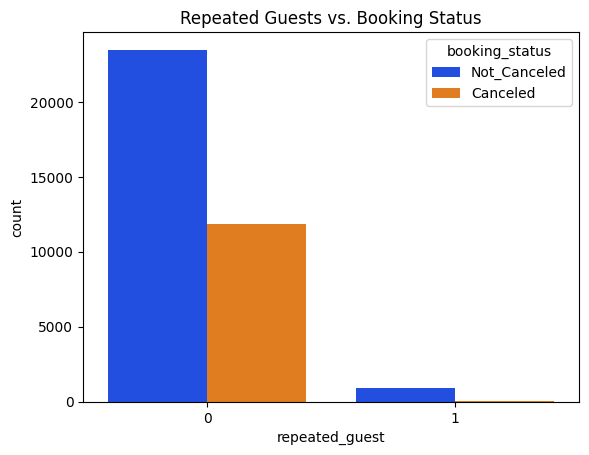

In [ ]:
sns.countplot(data=data, x='repeated_guest', hue='booking_status', palette='bright')
plt.title('Repeated Guests vs. Booking Status');

In [ ]:
pivot_table = pd.pivot_table(data, index='repeated_guest', columns='booking_status', aggfunc='size', fill_value=0)
proportions = pivot_table.div(pivot_table.sum(axis=1), axis=0)

print(proportions)

booking_status  Canceled  Not_Canceled
repeated_guest                        
0               0.335804      0.664196
1               0.017204      0.982796


####Special Requests vs Booking Status
- While many guests have specific requests when booking a hotel room, our data indicates that these special requirements do not influence booking cancellations. Interestingly, the cancellation rate is higher for bookings with no special requirements at all.

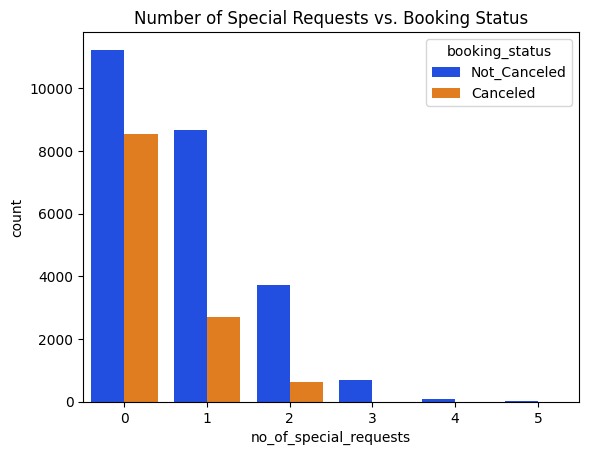

In [ ]:
sns.countplot(data=data, x='no_of_special_requests', hue='booking_status', palette='bright')
plt.title('Number of Special Requests vs. Booking Status');

In [ ]:
pivot_table = pd.pivot_table(data, index='no_of_special_requests', columns='booking_status', aggfunc='size', fill_value=0)
proportions = pivot_table.div(pivot_table.sum(axis=1), axis=0)

print(proportions)

booking_status          Canceled  Not_Canceled
no_of_special_requests                        
0                       0.432068      0.567932
1                       0.237668      0.762332
2                       0.145967      0.854033
3                       0.000000      1.000000
4                       0.000000      1.000000
5                       0.000000      1.000000


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
#Creating a copy of the original data
df = data.copy()

Feature Engineering

In [ ]:
# Dropping the booking id since it provides no purpose to our modeling efforts
df.drop(columns=['Booking_ID'], inplace=True)

Outlier Detection
- There are many outliers in the data
- However, we will not treat them as they are proper values

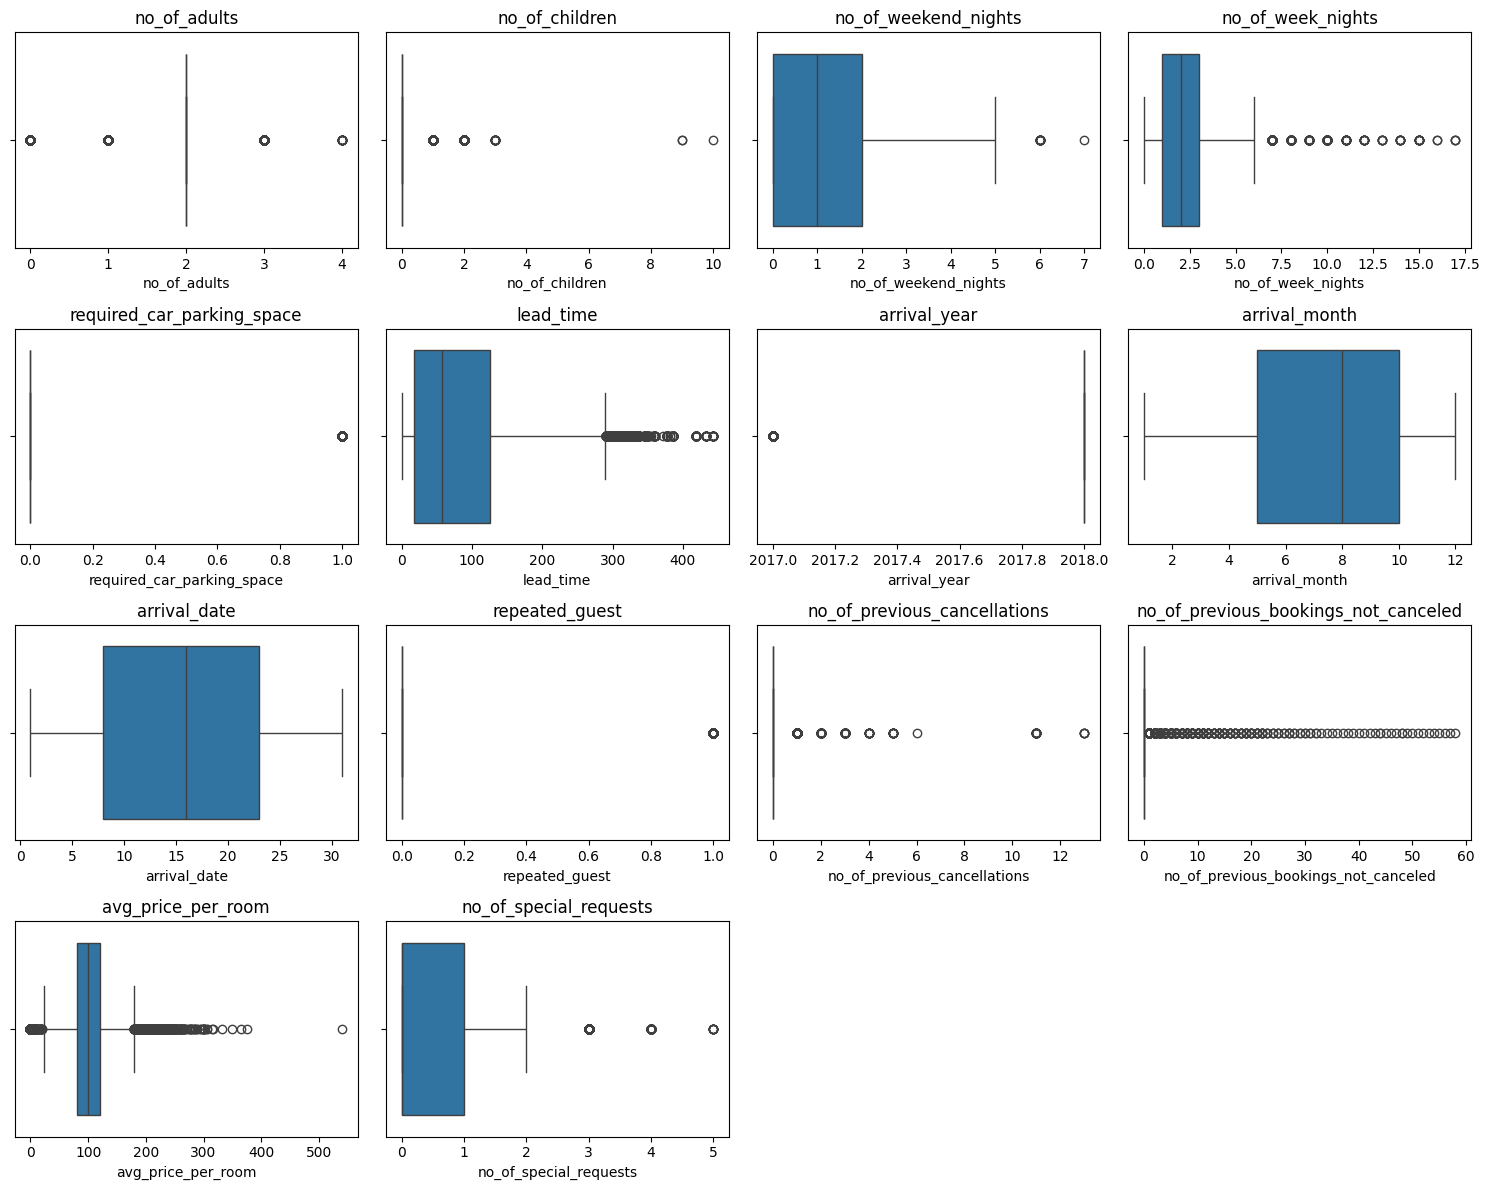

In [ ]:
#outlier detection using boxplot
num_cols=df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,12))
for i, variable in enumerate(num_cols):
  plt.subplot(4,4, i + 1)
  sns.boxplot(data=df, x=variable)
  plt.tight_layout()
  plt.title(variable)

plt.show()

Preparing data for modeling

In [ ]:
df2=data.copy()

In [ ]:
# Dropping the booking id since it provides no purpose to our modeling efforts
df2.drop(columns=['Booking_ID'], inplace=True)

In [ ]:
#encoding 'not canceled' as 0 and 'canceled' as 1 since we want to predict the canceled bookings
df2['booking_status']=df2['booking_status'].apply(lambda x:1 if x=='Canceled' else 0)


In [ ]:
#Defining x and y variables
X=df2.drop(['booking_status'], axis=1)
Y=df2['booking_status']

print(X.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segm

In [ ]:
print(Y.head())

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64


In [ ]:
Y.nunique()

2

In [ ]:
#Adding a constant to the independent variables since we will use statsmodel library
X = sm.add_constant(X)

In [ ]:
#creating dummy variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.shape

(36275, 28)

In [ ]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)

In [ ]:
#Verifying that the split poportion is correct
print('The shape of the training set is:', X_train.shape)
print('The shape of the testing set is:', X_test.shape)

The shape of the training set is: (25392, 28)
The shape of the testing set is: (10883, 28)


In [ ]:
#Verifying that the class proportion is similar to the original data
print('The percentage of classes in training set is:')
print(y_train.value_counts(normalize=True))
print('The percentage of classes in test set is:')
print(y_test.value_counts(normalize=True))

The percentage of classes in training set is:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
The percentage of classes in test set is:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


# Building a Logistic Regression model

In [ ]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.3293
Time:                        19:01:51   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

Observations
- Negative values of the coefficients show that the probability of a booking beeing canceled decreases with the increase of the corresponding attribute value.
- Possitive values of the coefficients show that the probability of a booking beeing canceled increases with the increase of the corresponding attribute value.
- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 5% (0.05) then any variable with a p-value les than 0.05 will be considered significant.

## Model performance evaluation

**Model can make wrong predictions as**:

1. Predicting a booking will be canceled but in reality the booking will not be canceled. (FP)

2. Predicting the booking will not be canceled but in reality the booking will be canceled. (FN)

**Which case is more important?**

* Prediction Number 2 is more important:

  * If we predict a the booking will be canceled but actually the booking ends up not being canceled, the company will not loose money nor try to increase efforts to resell that room.

  * If we predict a booking will not be canceled but actually ends up being canceled, the company will loose that room reservation and will either end up with an unbooked room or will have to make additionale efforts that require additional resourses to resell it.


**How to reduce this loss?**

* We need to reduce False Negatives in order to minimnize potential revenue loss.

* `recall` should be maximized as the greater the recfall, the higher the chances of reducing False Negatives

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels

def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

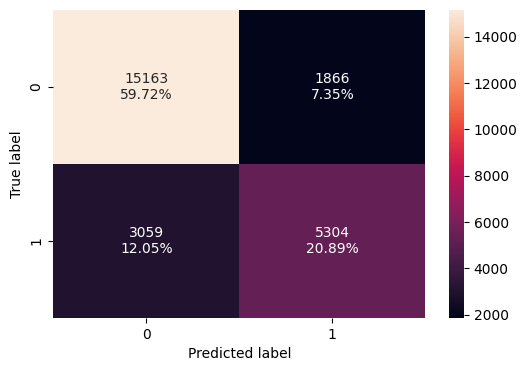

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.806041,0.634222,0.739749,0.682933


Observations

The Recall of the model is ~0.63 and we will try to maximize it further

The variables used to build the model might contain **multicollinearity**, which will affect the **p-values**

We will check for multicollinearity from the data to get reliable coefficients and p-values and then drop the variables with high p-value.

To drop the variables with high p-value we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.

In [ ]:
#lets define a function to check VIF for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
  vif = pd.DataFrame()
  vif['feature'] = predictors.columns

  #calculating VIF for each feature
  vif['VIF'] = [variance_inflation_factor(predictors.values,i) for i in range(len(predictors.columns))]

  return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,3.946816e+07
1,no_of_adults,1.348154e+00
2,no_of_children,1.978229e+00
3,no_of_weekend_nights,1.069475e+00
4,no_of_week_nights,1.095667e+00
5,required_car_parking_space,1.039928e+00
6,lead_time,1.394914e+00
7,arrival_year,1.430830e+00
8,arrival_month,1.275673e+00
9,arrival_date,1.006738e+00


- We have no multicollinearity in our variables.
- We will move on to remove variables with high p-values.

In [ ]:
#loop to eliminate p_values at a time

# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X_train[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.3283
Time:                        19:01:55   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

Observations
- We now have a logistic regression model with no multicollinearity and variables with significant statisticfal value.
- We'll consider the features in X_train1 as the final ones and lg1 as final model.

**Checking performance of final model**

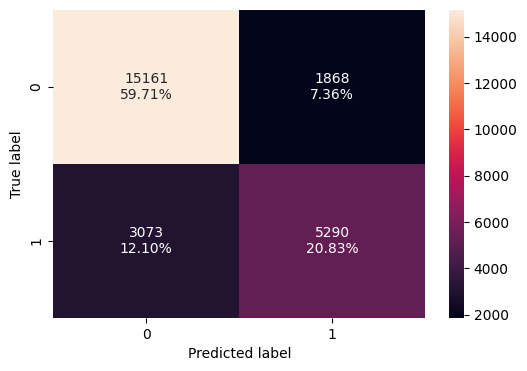

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805411,0.632548,0.739033,0.681657


**Test set performance**

- We have to first drop the columns from the test set that were dropped from the training set.

In [ ]:
X_test1 = X_test[list(X_train1.columns)]

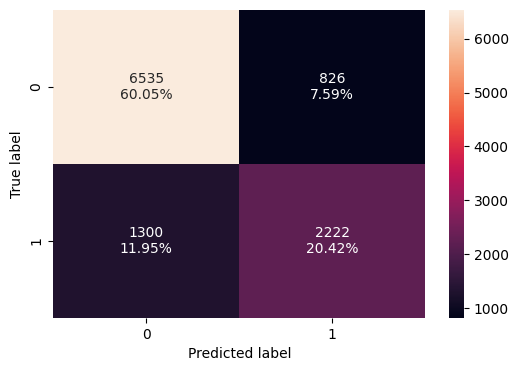

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.804649,0.630892,0.729003,0.676408


- The model is giving an okay Recall value of ~0.63 and ~0.63 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

###Model Performance Improvement

* Let's see if the recall score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold

**ROC-AUC on training set**

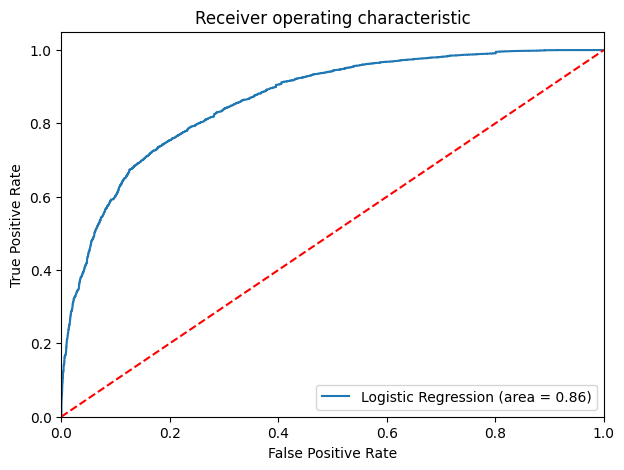

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is giving a good performance on training set.

**Optimal threshold using AUC-ROC curve**

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37104666234890077


**Checking model performance on the training set**

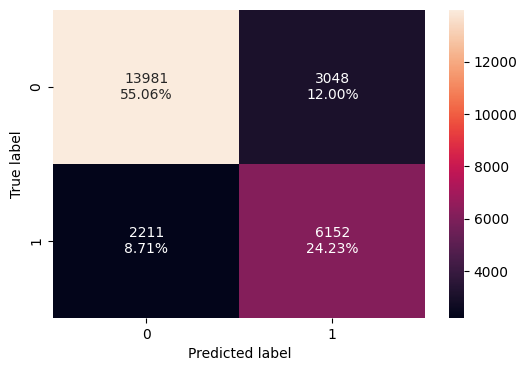

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792888,0.735621,0.668696,0.700564


- Recall value increased
- The model is giving better performance with regards to Recal performance metric

**Checking model performance on test set**

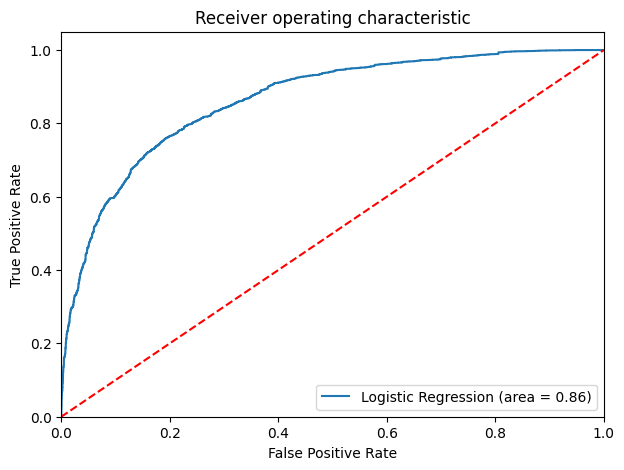

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

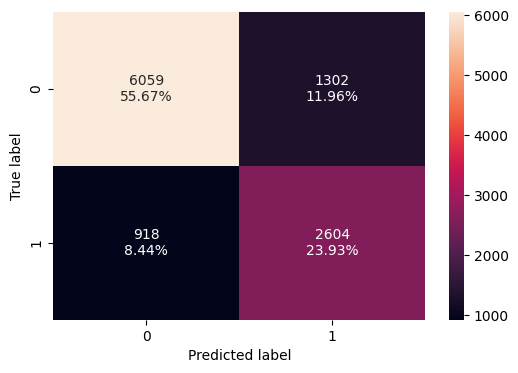

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.796012,0.739353,0.666667,0.701131


In [ ]:
optimal_threshold_auc_roc

0.37104666234890077

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression- Threshold (0.37)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression- Threshold (0.37)
Accuracy,0.805411,0.792888
Recall,0.632548,0.735621
Precision,0.739033,0.668696
F1,0.681657,0.700564


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression- Threshold (0.37)",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression- Threshold (0.37)
Accuracy,0.804649,0.796012
Recall,0.630892,0.739353
Precision,0.729003,0.666667
F1,0.676408,0.701131


- The two models are performing well on both training and test data without the problem of overfitting

- The model with a threshold (0.37) is giving better Recall score. Therefore it will be selected as the final model

## Final Model Summary

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.3283
Time:                        19:01:59   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

###Coefficient Interpretation


* Coefficient of some types of meal plans, average price per room, number of previous cancelations, arrival year, lead time, number of week and weekend nights, and nomber of adults and children are positive. An increase in these will lead to increase in chances of a booking to beeing canceled.

* Coefficient of room types, some market segments, number of special requests, repeated guests, required car parking space and the arrival month are negative. An increase in these will lead to decrease in chances of a booking being canceled.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.0,1.114754,1.164360,1.114753,1.042636,0.203048,1.015835,1.573235,0.958528,0.064797,1.257157,1.019348,0.229941,1.179916,1.330892,0.700461,0.753830,0.479403,0.380991,0.239033,0.452584,0.167504
Change_odd%,-100.0,11.475363,16.436009,11.475256,4.263629,-79.695231,1.583521,57.323511,-4.147245,-93.520258,25.715665,1.934790,-77.005947,17.991562,33.089244,-29.953888,-24.617006,-52.059666,-61.900934,-76.096691,-54.741616,-83.249628


# Building a Decision Tree model

In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

##Model Evaluation

As previously discussed in the logistic regression section, the company aims to maximize the recall score as it directly correlates with reducing False Negatives.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_tree = model.predict(predictors)

    acc_tree = accuracy_score(target, pred_tree)  # to compute Accuracy
    recall_tree = recall_score(target, pred_tree)  # to compute Recall
    precision_tree = precision_score(target, pred_tree)  # to compute Precision
    f1_tree = f1_score(target, pred_tree)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf_tree = pd.DataFrame(
        {"Accuracy": acc_tree, "Recall": recall_tree, "Precision": precision_tree, "F1": f1_tree,},
        index=[0],
    )

    return df_perf_tree

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred_tree = model.predict(predictors)
    cm = confusion_matrix(target, y_pred_tree)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

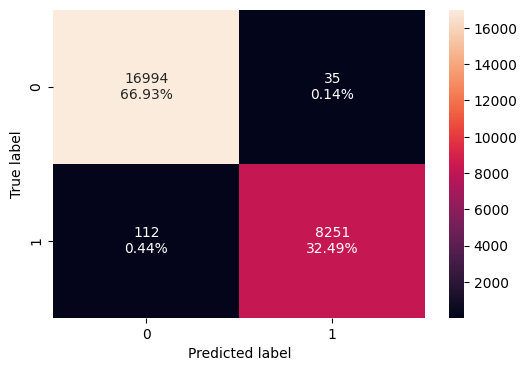

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.994211,0.986608,0.995776,0.991171


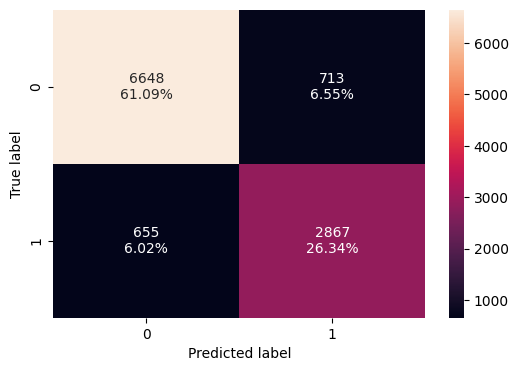

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.874299,0.814026,0.800838,0.807378


- There is a big disparity in performancfe of model on training set and test set, which suggests that the model is ovrfitting.

**Lets use pruning techniques to try and reduce overfitting**

## Decision Tree (Pre-pruning)



**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

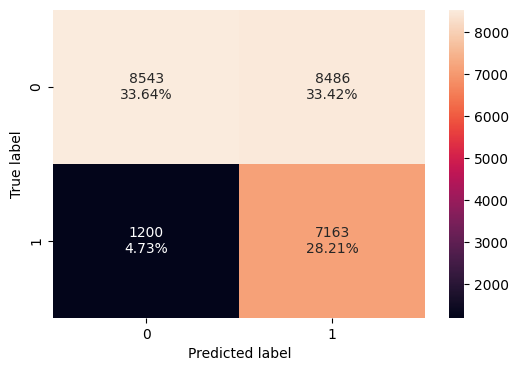

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.618541,0.856511,0.457729,0.596618


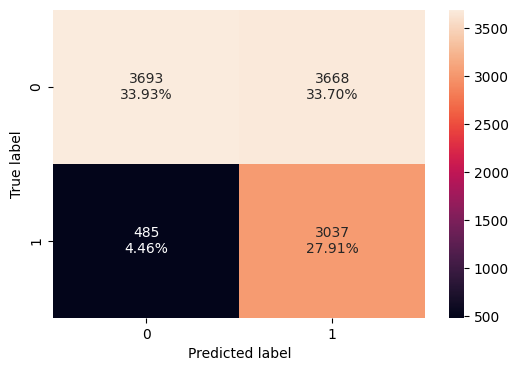

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.618396,0.862294,0.452946,0.593918


- The model is able to generalize well unseen data since the recall scores on both the train and test data are very similar. ~0.86

In [ ]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

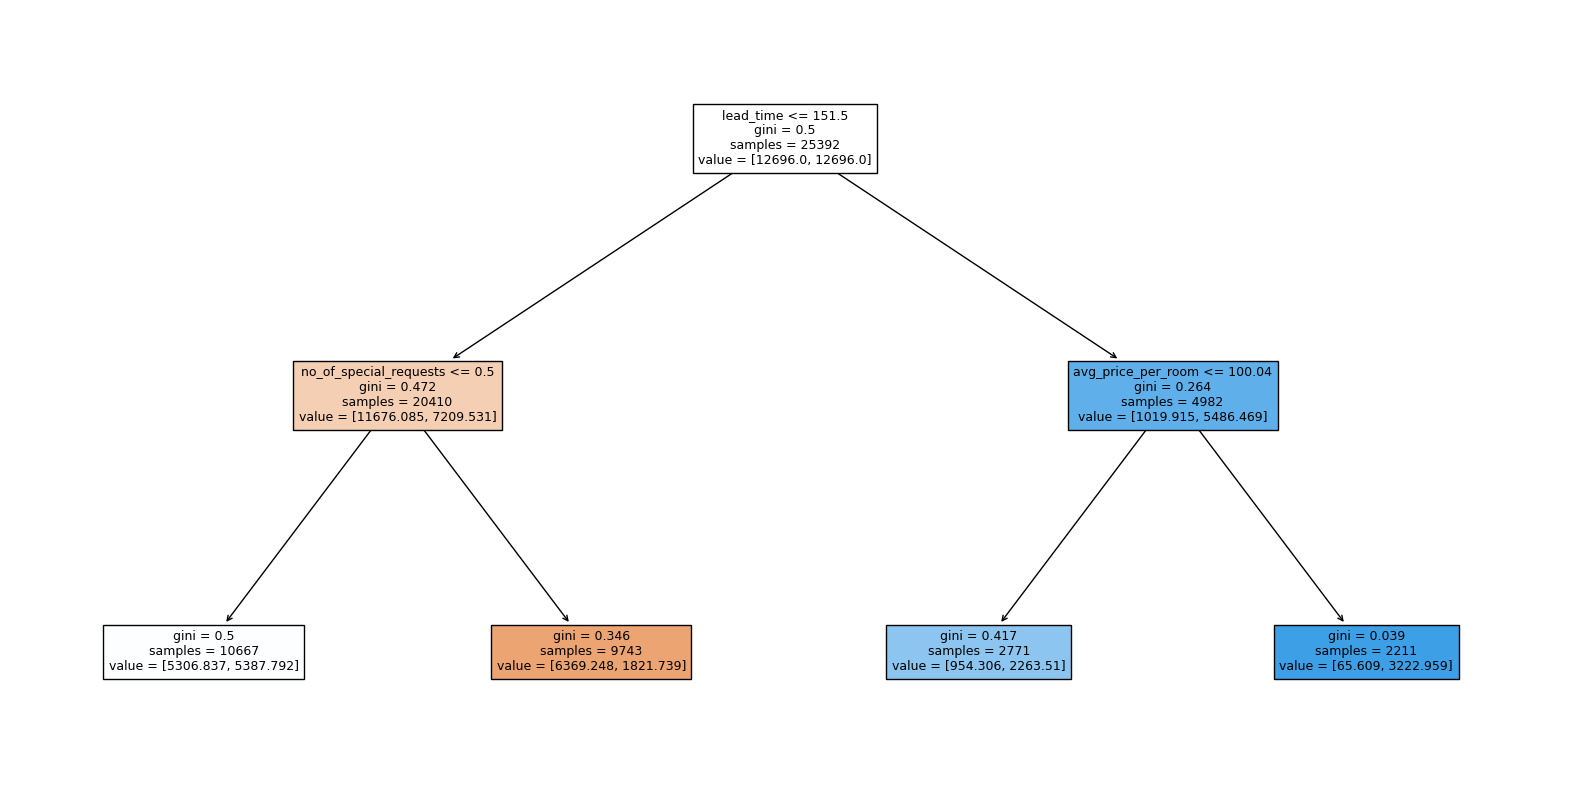

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.31, 2263.51] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [65.61, 3222.96] class: 1



In [ ]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.67701797, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08174876, 0.24123327,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

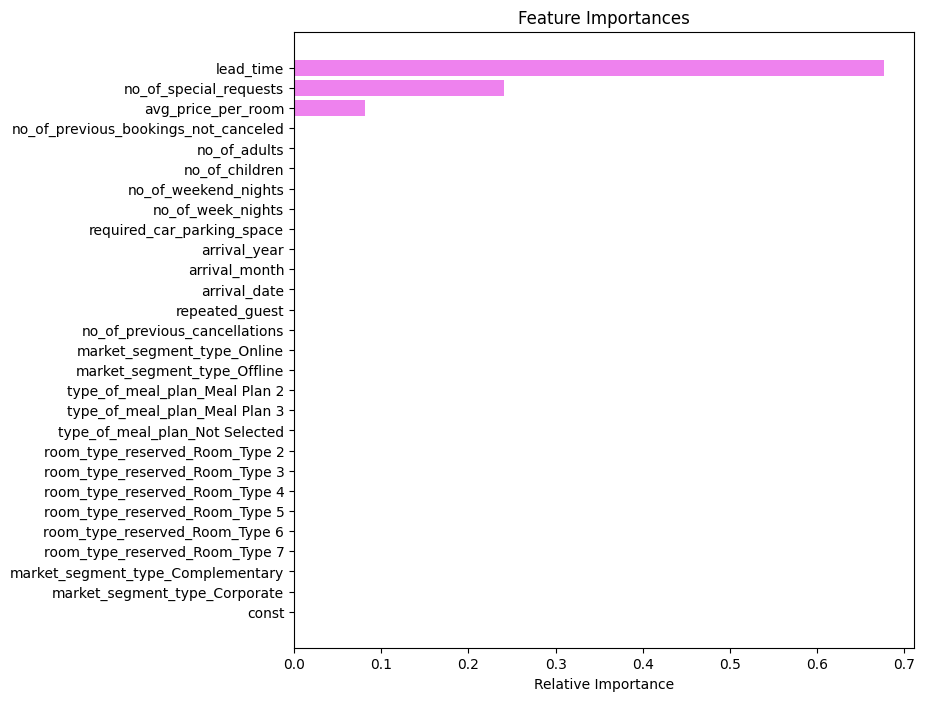

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- In the pre-prunned decision tree, lead time, number of special requests and average price per room are the most important features.

## Decision Tree (Post-pruning)


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.008376
1,0.000000e+00,0.008376
2,2.933821e-20,0.008376
3,2.933821e-20,0.008376
4,2.933821e-20,0.008376
...,...,...
1839,8.901596e-03,0.328058
1840,9.802243e-03,0.337860
1841,1.271875e-02,0.350579
1842,3.412090e-02,0.418821


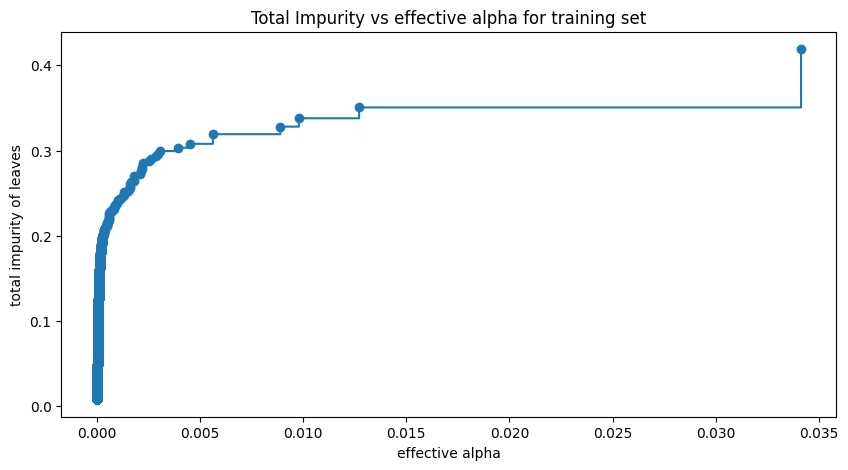

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

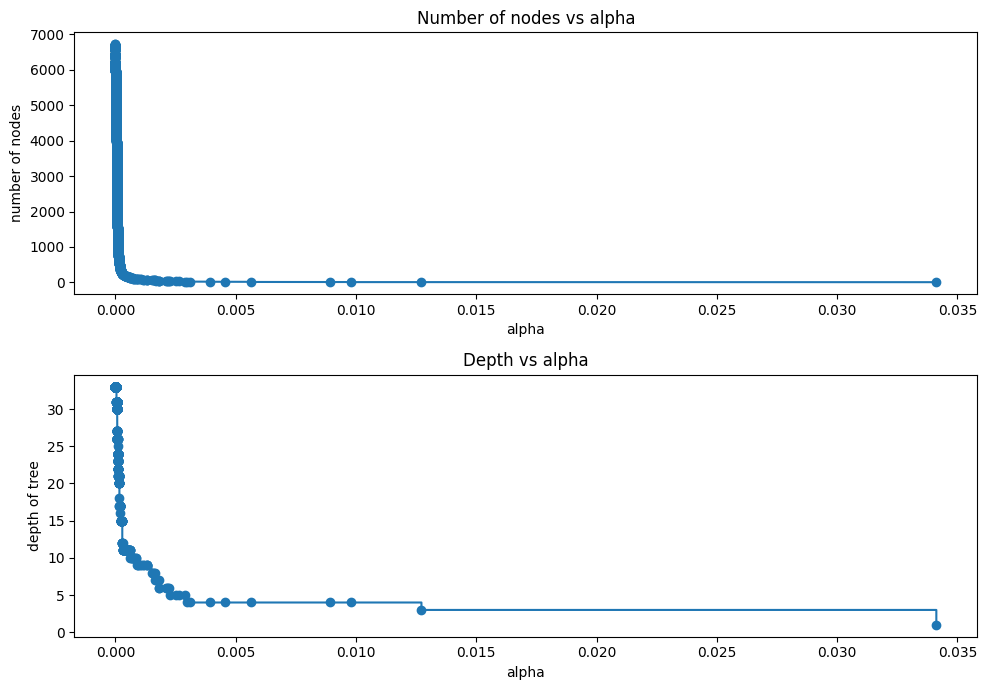

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

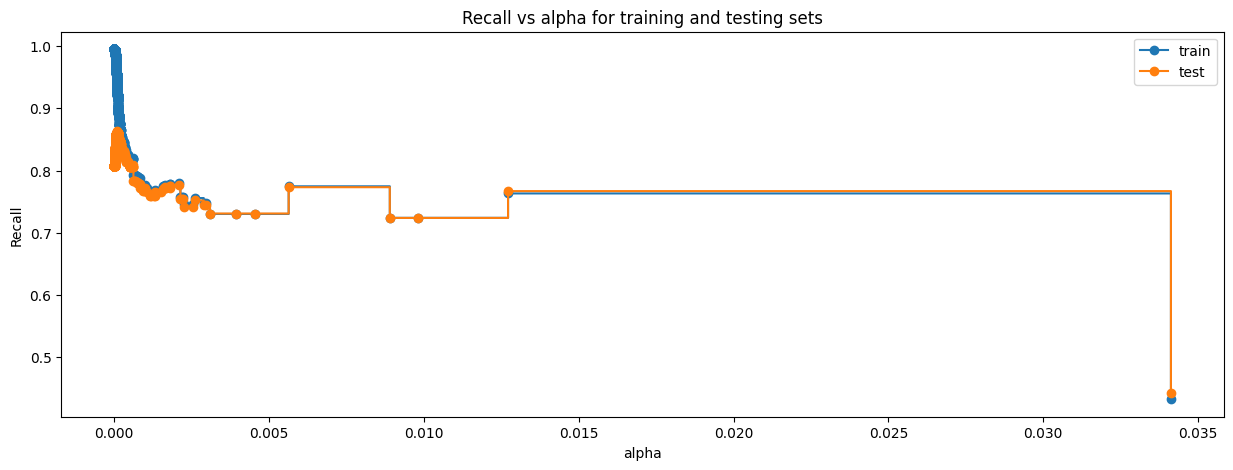

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=8.046650001478859e-05, class_weight='balanced',
                       random_state=1)


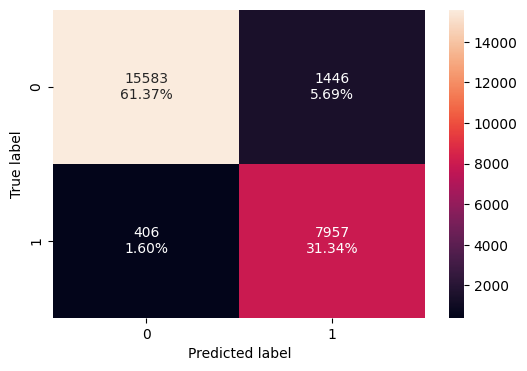

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.927064,0.951453,0.846219,0.895756


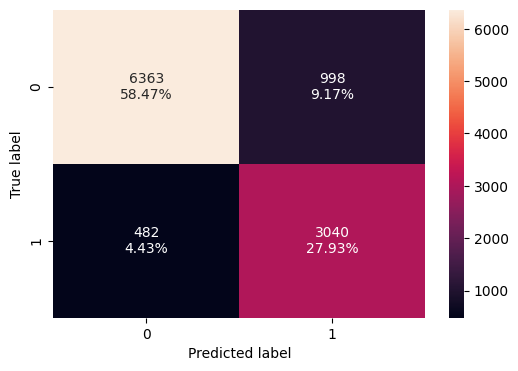

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.864008,0.863146,0.752848,0.804233


- The post- prunned tree is overfitting since the test resutls for Recall and Precision vary significantly from the train results.

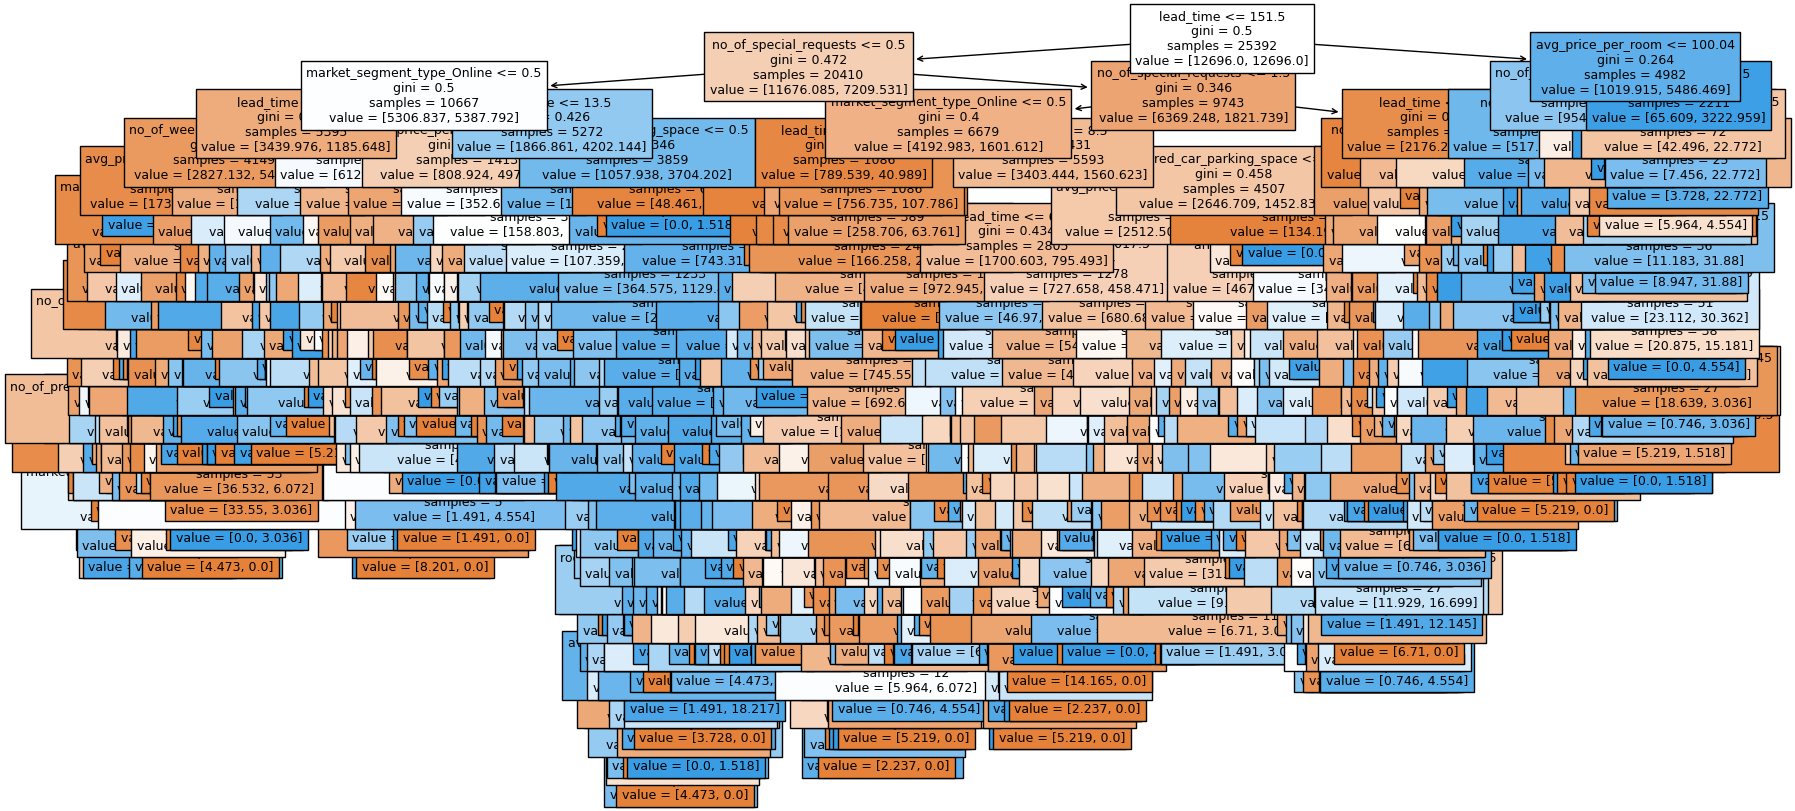

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

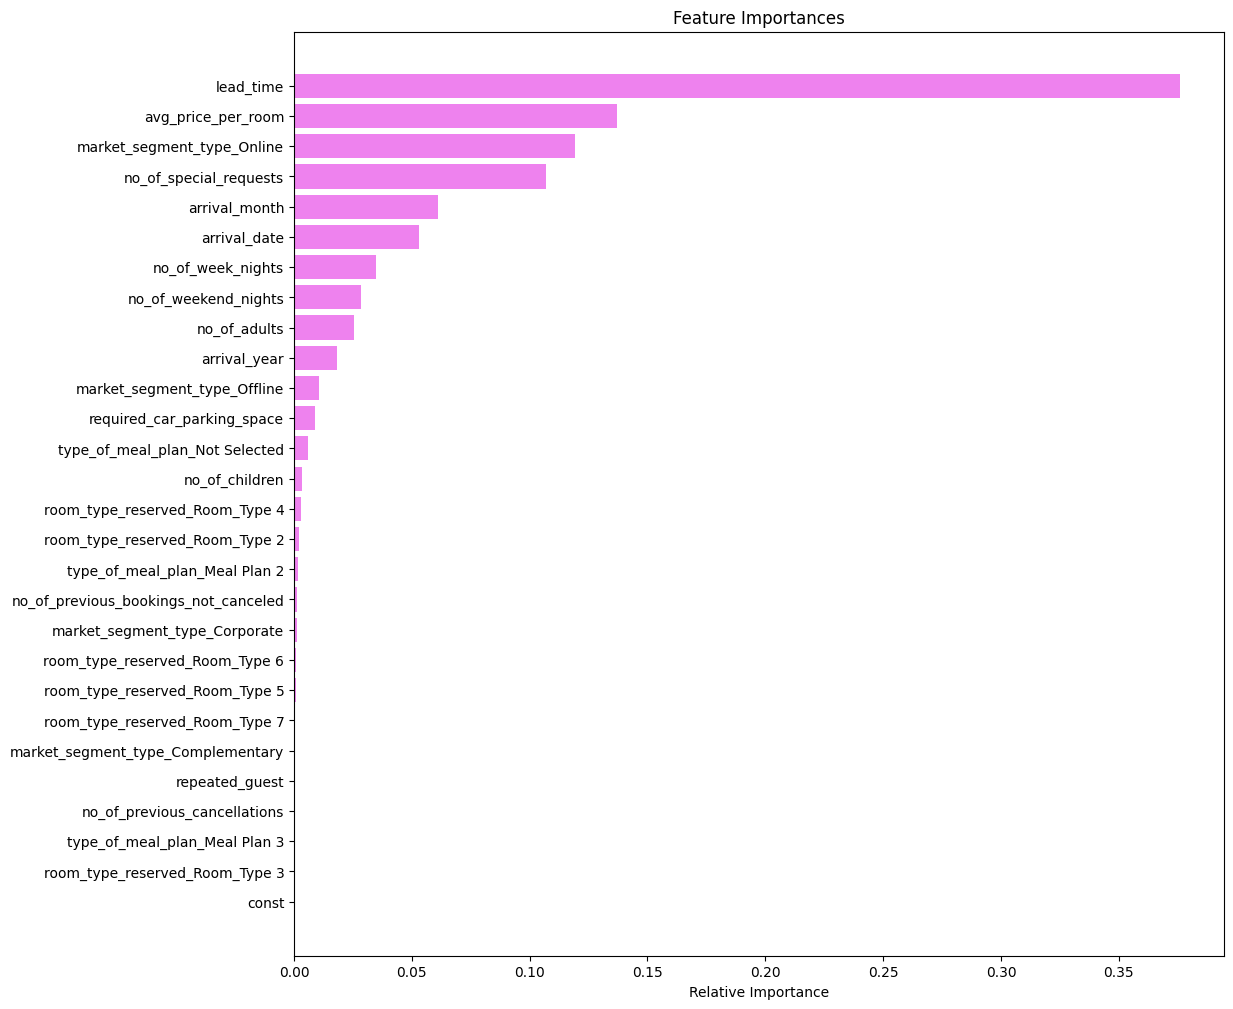

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Lead time, average price per room, market segment type online, number of special requests, and arrival month are the most important features for the post pruned tree.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison
models_train_comp_df2 = pd.concat(
    [
        log_reg_model_train_perf_threshold_auc_roc.T,
        decision_tree_perf_train_without.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,

    ],
    axis = 1,
)

models_train_comp_df2.columns = [
    'Regression Tree',
    'Decision Tree without prunning',
    'Decision Tree (Pre-Pruning)',
    'Decision Tree (Post-Pruning)'
]
print('Train set performance comparison:')

models_train_comp_df2

Train set performance comparison:


,Regression Tree,Decision Tree without prunning,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.792888,0.994211,0.618541,0.927064
Recall,0.735621,0.986608,0.856511,0.951453
Precision,0.668696,0.995776,0.457729,0.846219
F1,0.700564,0.991171,0.596618,0.895756


In [ ]:
# testing performance comparison
models_test_comp_df2 = pd.concat(
    [
        log_reg_model_test_perf_threshold_auc_roc.T,
        decision_tree_perf_test_without.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,

    ],
    axis = 1,
)

models_test_comp_df2.columns = [
    'Regression Tree',
    'Decision Tree without prunning',
    'Decision Tree (Pre-Pruning)',
    'Decision Tree (Post-Pruning)'
]
print('Test set performance comparison:')

models_test_comp_df2

Test set performance comparison:


,Regression Tree,Decision Tree without prunning,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.796012,0.874299,0.618396,0.864008
Recall,0.739353,0.814026,0.862294,0.863146
Precision,0.666667,0.800838,0.452946,0.752848
F1,0.701131,0.807378,0.593918,0.804233


- Decision trees are yielding higher recall scores compared to the regression tree. This difference may be attributed to the presence of outliers in our dataset.
- While decision tree models with pre-pruning and post-pruning exhibit similarly high recall scores on our test data, the post-pruned tree model shows signs of overfitting, indicated by more variation in the recall scores from train and test datasets compared to the pre-pruned tree.
- Consequently, opting for the pre-pruned tree model is the recommended course of action moving forward.

# Actionable Insights and Recommendations

- The model built can be used to predict if a booking reservation will be canceled or not and can correctly identify 86% of the booking cancelations.
- Lead time, number of special requests and average price per room are the most important variables in predicting whether a booking will be canceled or not.
- Leat time is the most significant feature for our tree model. The company should apply a cancelation fee for bookings made 150 days or more ahead of arrival since they are most likely to be canceled.
- Future data should be gathered to support the below suggestion, and other features such as number of special requests and average price per room should also be analyzed to determine if a cancelation fee should be applied or not. For example, our model has observed that if the lead time is more than 150 days, the average price per room is more than 100 dlls, then the booking is most likely to be canceled.
